In [1]:
import matplotlib.pyplot as plt
import pennylane as qml

In [68]:
def XOR(qubit1, qubit2, qubit_out):
    qml.CNOT(wires=[qubit1, qubit_out])
    qml.CNOT(wires=[qubit2, qubit_out])


def apply_constraints():
    XOR(0, 1 ,4)
    XOR(2, 3, 5)
    XOR(0, 2, 6)
    XOR(1, 3, 7)


def oracle(constraint_quibts, out_qubit):
    apply_constraints()
    qml.MultiControlledX(control_wires=constraint_quibts, wires=out_qubit, control_values=[1,1,1,1])
    apply_constraints()


def diffuser(variable_qubits, out_qubit):
    for i in range(4):
        qml.Hadamard(wires=i)
    qml.MultiControlledX(control_wires=variable_qubits, wires=out_qubit, control_values=[0,0,0,0])
    for i in range(4):
        qml.Hadamard(wires=i)
        

def init(variable_qubits, out_qubit):
    qml.PauliX(wires=out_qubit)
    qml.Hadamard(wires=out_qubit)
    for wire in variable_qubits:
        qml.Hadamard(wires=wire)


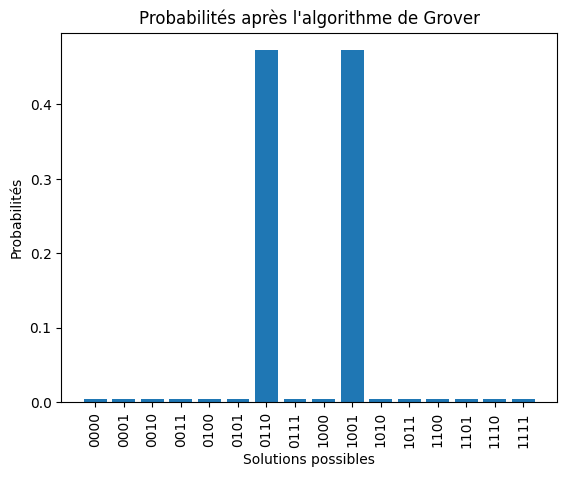

In [69]:
n_qubits = 9
variable_qubits = [0,1,2,3]
constraint_quibts = [4,5,6,7]
out_qubit = 8

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def grover_circuit(variable_qubits, constraint_quibts, out_qubit, nb_iters):
    init(variable_qubits, out_qubit)
    for _ in range(nb_iters):
        oracle(constraint_quibts, out_qubit)
        diffuser(variable_qubits, out_qubit)

    return qml.probs(wires=range(4))



probabilities = grover_circuit(variable_qubits, constraint_quibts, out_qubit, 2)

states = [f"{i:04b}" for i in range(2**4)]
plt.bar(states, probabilities)
plt.xlabel("Solutions possibles")
plt.ylabel("Probabilités")
plt.title("Probabilités après l'algorithme de Grover")
plt.xticks(rotation=90)
plt.show()

## (a) Expliquez comment on peut encoder la contrainte sur la première ligne à l’aide d’un circuit avec un qubit ancillaire.

La contrainte sur la première ligne peut s'exprimer comme suit : $ v_0 \oplus v_1\ $

Pour encoder cette contrainte avec un qubit ancillaire $c_0$ initialisé à l'état $|0>$, on peut utiliser 2 portes CNOT agissant sur le qubit ancillaire $c_0$ avec respectivement les qubits $v_0$ et $v_1$ en contrôle. 

Ainsi, si les qubits $v_0$ et $v_1$, le qubit ancillaire $c_0$ reste à l'état $|0>$. \
Autrement, si la contrainte est respectée, le qubit $c_0$ passe à l'etat $|1>$.

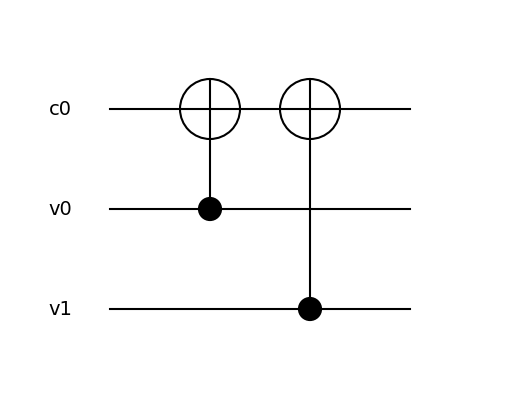

In [70]:
dev = qml.device("default.qubit", wires=["v0", "v1", "c0"])
fig, ax = qml.draw_mpl(XOR)("v0", "v1", "c0")
plt.show()

## (b) Expliquez le rôle de la porte CCCCNOT dans l’oracle.

La porte CCCCNOT permet d'appliquer une porte PauliX sur un qubit ancillaire "out" lorsque tout les qubits ancillaires relatifs aux contraintes lignes/colonnes ($c_0$, $c_1$, $c_2$, $c_3$) sont à l'état $|1>$ (c'est à dire quand toutes les conditions sont vérifiées).
Cette porte CCCCNOT va permettre d'obtenir un déphasage uniquement lorsque toutes les contraintes sont vérifiées.

## (c) Pourquoi initialise-t-on le dernier qubit dans l’état |−〉 ?

Pour obtenir un déphasage lorsque la porte CCCCNOT va être activée.

## (d) Quel est le nombre optimal d’itérations de Vf et W dans le circuit ? Présentez vos calculs

Dans le cas d'un sudoku 2x2, il y a m=2 solutions possibles parmi N=16 possibilités. En utilisant l'analyse géométrique vu en cours, on sait que : 
$$ sin(\theta) = \frac{\sqrt{m}}{\sqrt{N}} $$

Cependant la valeur de $\frac{\sqrt{m}}{\sqrt{N}}$ est proche de 0, on peut donc faire l'approximation suivante:
$$\theta \approx \frac{\sqrt{m}}{\sqrt{N}} $$

où $\theta$ représente l'angle forme par le vecteur orthogonal à la solution et le vecteur représentant l'état initial de nos variables.
A chaque itération de l'algorithme de Grover, une rotation de $2 \theta$ dans le sens trigonométrique est appliqué au vecteur représentant l'état initial de nos variables. Ainsi, on cherche la valeur de k (nombre d'itération) telle que : 

$$\sin(\theta + k \times 2\theta) = 1$$

En résolvant cette équation, on trouve:
$$
\begin{align*}
k & \approx \frac{\pi}{4} \times \frac{\sqrt{N}}{\sqrt{m}} - \frac{1}{2} \\
  & = \frac{\pi}{\sqrt{2}} - \frac{1}{2} \\
  & \approx 1,7 \\
  & \approx 2
\end{align*}
$$

Ainsi, on trouve que le nombre optimal d'itération pour l'agorithme de Grover dans ce cas est 2

## (e) Quelle est la probabilité de succès ?

La probabilité de succés vaut :
$$
\sin\left((2k + 1)\theta\right)^2 = \sin\left((2k + 1)arcsin(\frac{\sqrt{m}}{\sqrt{N}})\right)^2 \approx 0,945
$$

## (f) Représentez graphiquement le circuit complet à simuler

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


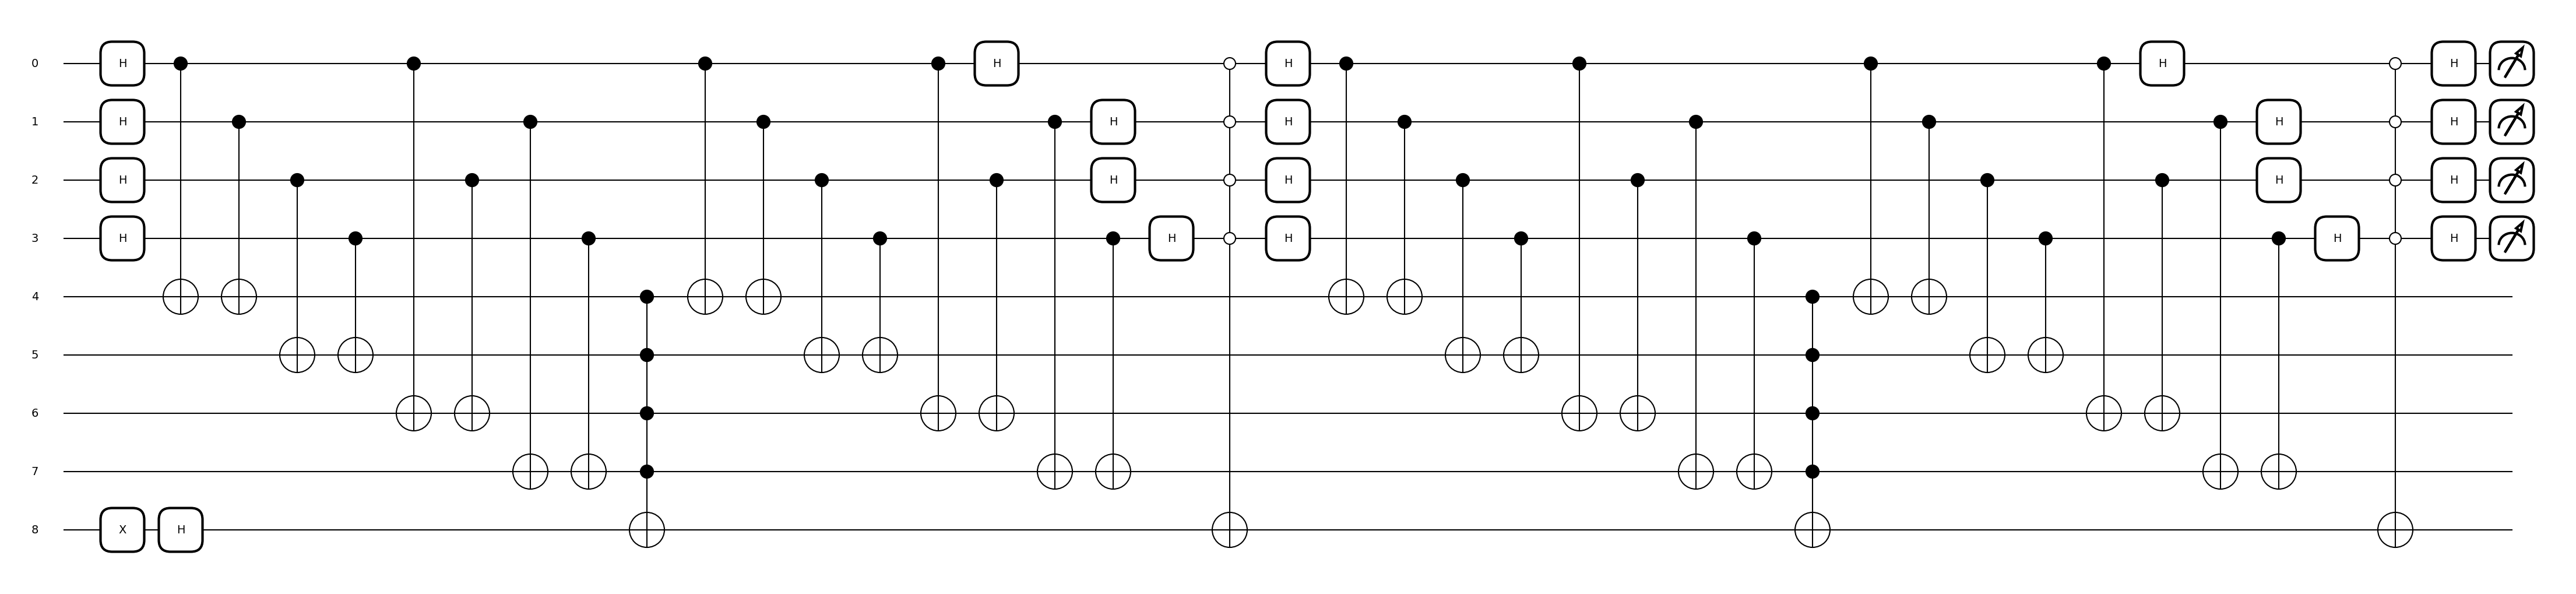

In [71]:
fig, ax = qml.draw_mpl(grover_circuit)(variable_qubits, constraint_quibts, out_qubit, 2)
plt.show()

## (g) Illustrez les probabilités de mesures en sortie du circuit

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


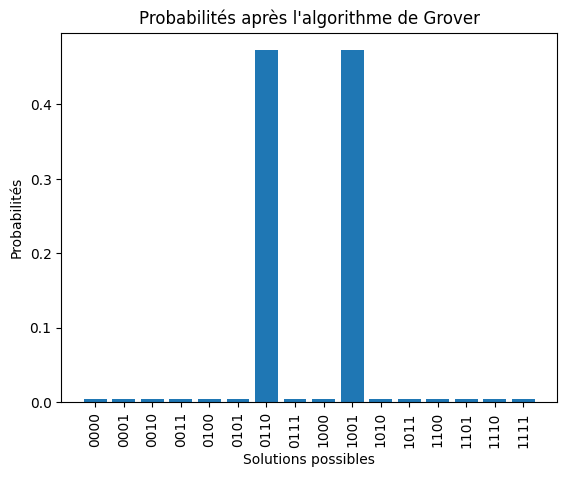

In [72]:
probabilities = grover_circuit(variable_qubits, constraint_quibts, out_qubit, 2)

states = [f"{i:04b}" for i in range(2**4)]
plt.bar(states, probabilities)
plt.xlabel("Solutions possibles")
plt.ylabel("Probabilités")
plt.title("Probabilités après l'algorithme de Grover")
plt.xticks(rotation=90)
plt.show()

(h) Combien de portes CNOT faut-il pour rouler le circuit sur une machine réelle ?

In [73]:
import pennylane as qml
from pennylane.tape import QuantumTape
from pennylane.operation import Operation
from pennylane.measurements import MeasurementProcess
from pennylane.transforms import create_expand_fn

# les portes de base de notre expansion 
# je triche ici en rajoutant RZ, RX, RY 
# mais c'est surement ok vu que ce qui nous intéresse au final c'est les CNOT
base_gates = ["T", "Adjoint(T)", 
              "S", "Adjoint(S)", 
              "SX", "Adjoint(SX)", 
              "PauliX", "PauliY", "PauliZ", 
              "Hadamard", "CNOT", 
              "RZ", "RX", "RY"]

def decompose(tape : QuantumTape) -> QuantumTape:
    def stop_at(op : Operation):
        return op.name in base_gates

    # pennylane create_expand_fn does the job for us 
    custom_expand_fn = create_expand_fn(depth=9, stop_at=stop_at)
    tape = custom_expand_fn(tape)
    return tape

# une fonction utilitaire qui crée un noeud à partir d'un tape
# ya surement un meilleur moyen de faire ça, mais c'est ce que j'ai
@qml.qnode(dev)
def arbitrary_circuit(tape : QuantumTape, measurement = qml.counts):
    """
    create a quantum function out of a tape and a default measurement to use (overrides the measurements in the tape)
    """
    for op in tape.operations:
        if len(op.parameters) > 0:
            qml.apply(op)
        else:
            qml.apply(op)
    
    def get_wires(mp : MeasurementProcess):
        return [w for w in mp.wires] if mp is not None and mp.wires is not None and len(mp.wires) > 0 else tape.wires

    # retourner une liste de mesures si on a plusieurs mesures, sinon retourner une seule mesure
    return [measurement(wires=get_wires(meas)) for meas in tape.measurements] if len(tape.measurements) > 1 \
        else measurement(wires=get_wires(tape.measurements[0] if len(tape.measurements) > 0 else None))

In [74]:
grover_circuit(variable_qubits, constraint_quibts, out_qubit, 2)
tape = grover_circuit.tape
tape = decompose(tape)

specs = qml.specs(arbitrary_circuit)(tape)
resources = specs["resources"]

print("\n".join([f"{k} : {v}" for k,v in resources.gate_types.items()]))

PauliX : 17
Hadamard : 101
CNOT : 336
RZ : 112
RY : 56
Adjoint(T) : 120
T : 160


Il faudrait donc 336 portes CNOT pour rouler le circuit sur une machine réelle